Parker Williamson
Take home practice challenge - Ultimate Inc.

Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import numpy as np

In [2]:
#load in data
import json
json1_file = open('logins.json')
json1_str = json1_file.read()
json1_data = json.loads(json1_str)

In [3]:
from datetime import datetime,timedelta

In [4]:
#convert str date to datetime
dates_list = [datetime.strptime(date, '%Y-%m-%d %X') for date in json1_data['login_time']]

In [5]:
print(dates_list[0])

1970-01-01 20:13:18


In [6]:
import pandas as pd

In [7]:
#create 15 min interval time bins
timemin = min(dates_list)
timemax = max(dates_list)
timediff = timedelta(weeks=0, days=0, hours=0, minutes=15, seconds=0)
timeIntervals = pd.date_range(start = timemin-timediff, end = timemax+timediff, freq = timediff)

In [8]:
print(timemin)
print(timemax)

1970-01-01 20:12:16
1970-04-13 18:57:38


In [9]:
#convert list to dataframe
df = pd.DataFrame(dates_list,columns=['date'])

In [10]:
#assign the bins to the correct bucket
df['bucket'] = pd.cut(df.date, bins = timeIntervals)

In [11]:
df_count = df.groupby('bucket').count()
df_count.rename(index=str,columns={'date':'count'})

,count
bucket,
"(1970-01-01 19:57:16, 1970-01-01 20:12:16]",1
"(1970-01-01 20:12:16, 1970-01-01 20:27:16]",7
"(1970-01-01 20:27:16, 1970-01-01 20:42:16]",8
"(1970-01-01 20:42:16, 1970-01-01 20:57:16]",6
"(1970-01-01 20:57:16, 1970-01-01 21:12:16]",3
"(1970-01-01 21:12:16, 1970-01-01 21:27:16]",3
"(1970-01-01 21:27:16, 1970-01-01 21:42:16]",1
"(1970-01-01 21:42:16, 1970-01-01 21:57:16]",1
"(1970-01-01 21:57:16, 1970-01-01 22:12:16]",12


In [12]:
a = df['bucket'][0]
print(type(a.left))

<class 'pandas._libs.tslib.Timestamp'>


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

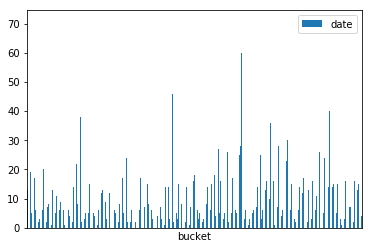

In [14]:
#plot the results
df_count.plot(kind='bar')
plt.xticks([])
plt.show()

In [15]:
#the results are hard to draw conclusions from so scale
#it by time of day instead of absolute time
from datetime import date
d = datetime.today()

In [16]:
#get login times instead of date times from before
time_list = [datetime.combine(d,datetime.strptime(date, '%Y-%m-%d %X').time()) for date in json1_data['login_time']]

In [17]:
#create buckets
startTime = d.replace(hour=0,minute=0,second=0,microsecond=0)
endTime = d.replace(hour=23,minute=59,second=59,microsecond=0)
timediff = timedelta(weeks=0, days=0, hours=0, minutes=15, seconds=0)
timeIntervals = pd.date_range(start = startTime, end = endTime, freq = '15 min')

In [18]:
df_time = pd.DataFrame(time_list,columns=['time'])

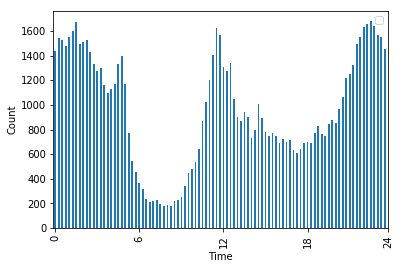

In [19]:
#assign buckets and plot results
df_time['bucket'],bins = pd.cut(df_time.time, bins = timeIntervals, retbins=True)
totalTimeCounts = df_time.groupby('bucket').count()
totalTimeCounts.plot(kind='bar')
tickpos = [0,int(len(bins)/4),int(2*len(bins)/4),int(3*len(bins)/4),len(bins)-1]

plt.xticks(tickpos,[0,int(24/4),int(24/2),int(3*24/4),24])
plt.ylabel('Count')
plt.xlabel('Time')
plt.legend([])
plt.show()

The above plot shows daily trends and is logins go down when people would be working.

In [20]:
print(dates_list[0].weekday())

3


In [47]:
weekday = [date.weekday() for date in dates_list]

In [49]:
print(weekday)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [60]:
bins = [0,1,2,3,4,5,6,7]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

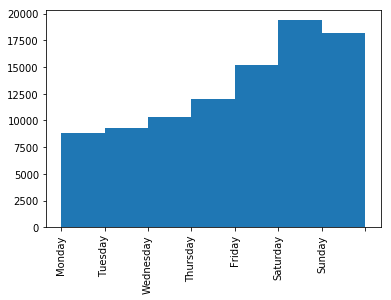

In [61]:
plt.hist(weekday,bins)
plt.xticks(bins, labels, rotation=90)
plt.show()

The weekly plot show usage is lower during the week like the daily chart

______________________________________________________________________________

Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. There are a couple ways that the success of that experiment could be measured. The initial way would be to measure if the distance driven of drivers from both cities went up relatice to other cities. A more accurate measurement would likely be if the weekday driving percentage of drivers from both cities went up compared to the data from all other cities. Having drivers more flexibly in both cities should bring down the avg surge percentage in both cities. Ideally the number of cross city pairs (drivers with riders) should greatly increase.

2. If the percentage of cross city driver/rider pairs is a measurement that should dirrectly show how effective the result is. 

a. Ideally you find two weeks that are similar, two weeks right next to eachother without any major holidays or events should be statistically similar. Then you use one of the weeks as a control to measure against (go with the first, because that is the existing setup and couldn't be changed by a past week. You then compare the results of the normal week and treatment week (where you gave the wavers). The comparison is done with a z-test to see if the mean is possible due to random deviation.

b. statistical tests - z-test
A z-test is used to determine whether two samples have the same mean and therefore are statistically similar sets of data. It assumes normal distribution and there must be more than 30 samples.

The code would look roughly like:
"from statsmodels.stats import weightstats as stests
testResult=stests.ztest(treatmentData,value=controlMean)"

where controlMean is equal to the mean of the control group and the treatmentData would be the data list from the other group.


c. interpret
If the testResult (the p-value) is <.025 then the difference in mean is statistically significant and the toll reimbursements were successful. So if the p-value is less than .025 the mean of the test with the reimbursement had a statistically signifigant change in the number of driver/rider pairs from each of the two cities. It would be wise to other compare to a completely unrelated city in the same week to help verify that other data such as press could not have affected the results.

__________________________________________________________________________

Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [24]:
#initialize the data
import json
json2_file = open('ultimate_data_challenge.json')
json2_str = json2_file.read()
json2_data = json.loads(json2_str)

In [25]:
#convert to pandas dataframe from easy control
flat_data = pd.DataFrame.from_dict(json2_data)

In [26]:
#change times from str to datetimes
flat_data['last_trip_date'] = pd.to_datetime(flat_data.last_trip_date,format='%Y-%m-%d')
flat_data['signup_date'] = pd.to_datetime(flat_data.signup_date,format='%Y-%m-%d')

In [27]:
#solve for whether each user was retained or not and show an example
datePulledDate = max(flat_data['last_trip_date'])
cutoff = datePulledDate-timedelta(days=30)
flat_data['retention'] = flat_data.last_trip_date>=cutoff
print(flat_data[:2])

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7        1.1   
1      8.26                   5.0                   5.0        1.0   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  retention  
0                       4                 True         46.2       True  
1                       0                False         50.0      False  


There are missing Ratings of an by drivers

In [28]:
#calculate percentage active
print(100*sum(flat_data.retention)/len(flat_data),'percent active')

37.608 percent active


Chart exploration of retention

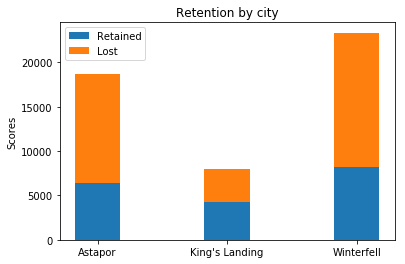

In [29]:
#create a general plot instance to show the different data
import numpy as np
import matplotlib.pyplot as plt

#general plot
def catPlot(category = 'city'):
    x_ret = flat_data[flat_data.retention==True][category]
    x_lost = flat_data[flat_data.retention==False][category]
    vc_ret = x_ret.value_counts()
    vc_lost = x_lost.value_counts()
    vc_ret.sort_index()
    vc_lost.sort_index()
    N=len(vc_lost)
    #ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(list(vc_lost.keys()), vc_ret, width)
    p2 = plt.bar(list(vc_lost.keys()), vc_lost, width, bottom=vc_ret)

    plt.ylabel('Scores')
    plt.title('Retention by ' +category)
    plt.xticks(list(vc_lost.keys()), list(vc_lost.keys()))
    plt.legend((p1[0], p2[0]), ('Retained', 'Lost'))

    plt.show()

catPlot('city')

Clearly King's Landing has much higher retention than the other two cities and definitely worth exploring what make it better at retaining users.

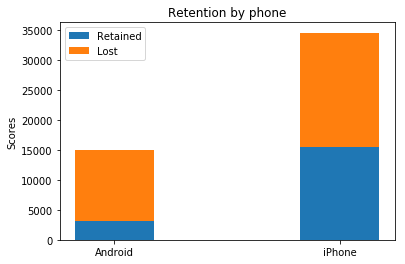

In [30]:
catPlot('phone')

The android retention rate is low and the android app may need some work.

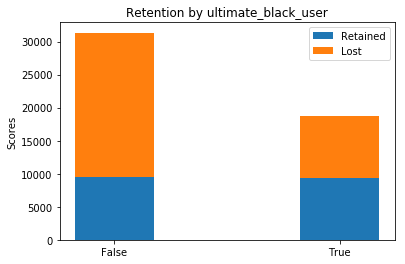

In [31]:
catPlot('ultimate_black_user')

people who used uber black had much higher retention and whether that is correlation or causation should be investigated.

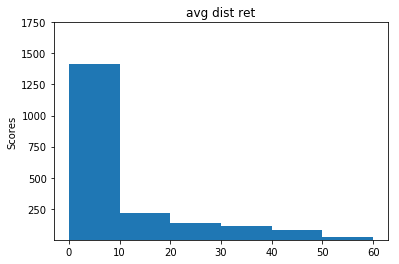

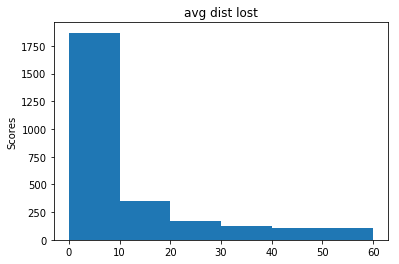

In [32]:
#the rest of the data was not categorical so the plots had to be a little different
def dataPlot(category,binpos=None,ytickpos=None):
    x_ret = flat_data[flat_data.retention==True][category]
    x_lost = flat_data[flat_data.retention==False][category]
    vc_ret = x_ret.value_counts()
    vc_lost = x_lost.value_counts()
    #vc_ret.sort_index()
    vc_lost.sort_index()
    N=len(vc_lost)
    #ind = np.arange(N)    # the x locations for the groups
    #width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.hist(vc_ret, bins= binpos)

    plt.ylabel('Scores')
    plt.title('avg dist ret')
    if ytickpos != None:
        plt.yticks(ytickpos)
    plt.show()
    p2 = plt.hist(vc_lost, bins= binpos)
    plt.ylabel('Scores')
    plt.title('avg dist lost')
    plt.show()
    
dataPlot('avg_dist',[0,10,20,30,40,50,60],[250,500,750,1000,1250,1500,1750])

avg_rating_by_driver
Retained mean:  4.762771739130456


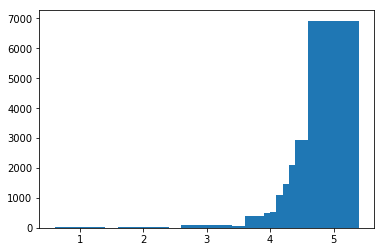

Lost mean:  4.787464148754435


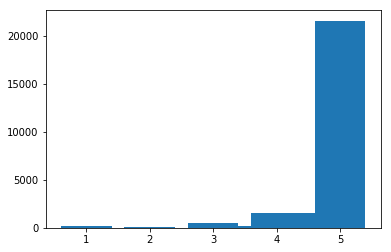

In [33]:
x_ret = flat_data[flat_data.retention==True]['avg_rating_by_driver']
x_lost = flat_data[flat_data.retention==False]['avg_rating_by_driver']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('avg_rating_by_driver')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('Lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

avg_rating_of_driver
Retained mean:  4.592930351735465


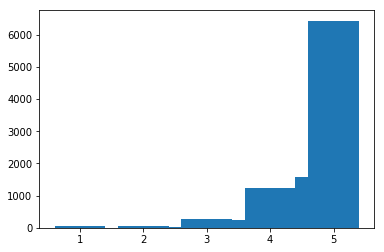

lost mean:  4.607556868776835


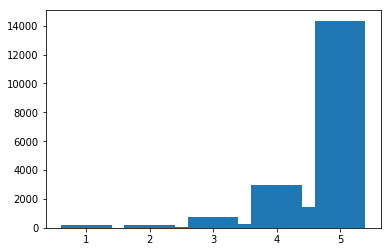

In [34]:
x_ret = flat_data[flat_data.retention==True]['avg_rating_of_driver']
x_lost = flat_data[flat_data.retention==False]['avg_rating_of_driver']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('avg_rating_of_driver')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

surge_pct
Retained mean:  9.152797277175118


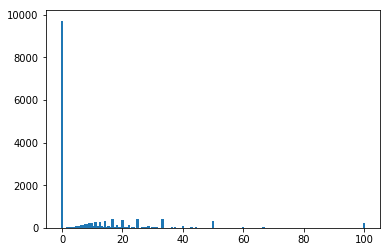

lost mean:  8.666739325554499


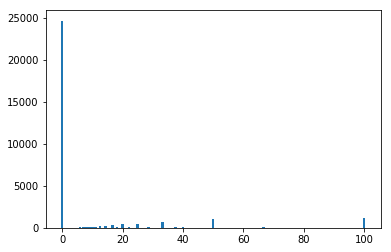

In [35]:
x_ret = flat_data[flat_data.retention==True]['surge_pct']
x_lost = flat_data[flat_data.retention==False]['surge_pct']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('surge_pct')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

Retained mean:  1.073809295894508


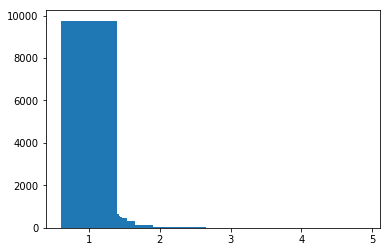

lost mean:  1.075339146044379


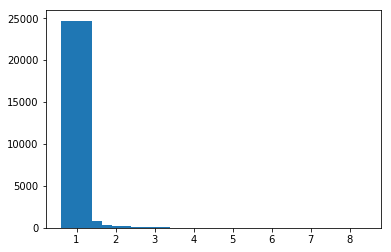

In [36]:
x_ret = flat_data[flat_data.retention==True]['avg_surge']
x_lost = flat_data[flat_data.retention==False]['avg_surge']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

weekday_pct
Retained mean:  61.3890342480323


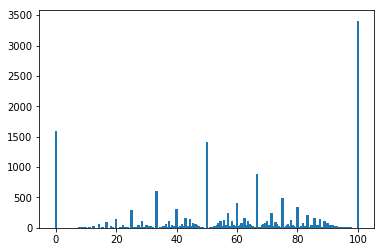

lost mean:  60.64703167072686


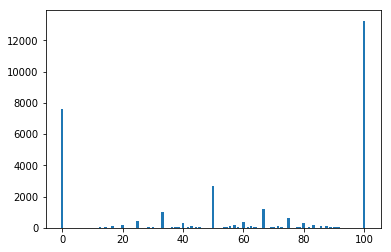

In [37]:
x_ret = flat_data[flat_data.retention==True]['weekday_pct']
x_lost = flat_data[flat_data.retention==False]['weekday_pct']
vc_ret = x_ret.value_counts()
vc_lost = x_lost.value_counts()
print('weekday_pct')
print('Retained mean: ',np.mean(x_ret))
plt.bar(list(vc_ret.keys()), vc_ret)
plt.show()
print('lost mean: ',np.mean(x_lost))
plt.bar(list(vc_lost.keys()), vc_lost)
plt.show()

Part 2.  train model to predict whether person is retained or not

In [38]:
print(max(flat_data.last_trip_date)-min(flat_data.signup_date))

181 days 00:00:00


In [39]:
#import needed functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#eliminate all non-numerical data before classification
flat_data['signup_date_year'] = pd.Series([date.year for date in flat_data['signup_date']])
flat_data['signup_date_month'] = pd.Series([date.month for date in flat_data['signup_date']])
flat_data['signup_date_day'] = pd.Series([date.day for date in flat_data['signup_date']])

#when included in model should give 100% accuracy
#flat_data['last_trip_date_year'] = pd.Series([date.year for date in flat_data['last_trip_date']])
#flat_data['last_trip_date_month'] = pd.Series([date.month for date in flat_data['last_trip_date']])
#flat_data['last_trip_date_day'] = pd.Series([date.day for date in flat_data['last_trip_date']])

flat_data['phone'] = flat_data['phone'].astype("category").cat.codes
flat_data['city'] = flat_data['city'].astype("category").cat.codes

Find all remaining NA values

In [40]:
flat_data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
retention                    0
signup_date_year             0
signup_date_month            0
signup_date_day              0
dtype: int64

In [41]:
print(flat_data['avg_rating_by_driver'].median())

5.0


In [42]:
#fill NA values
flat_data['avg_rating_by_driver'] = flat_data['avg_rating_by_driver'].fillna(value = flat_data['avg_rating_by_driver'].median())
flat_data['avg_rating_of_driver'] = flat_data['avg_rating_of_driver'].fillna(value = flat_data['avg_rating_of_driver'].median())

In [67]:
#randomly split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(\
    flat_data.drop('retention',axis=1)\
    .drop('signup_date',axis=1)\
    .drop('last_trip_date',axis=1),\
    flat_data.retention, \
    test_size=0.33, \
    random_state=42)

#instatiate and train classifier
clf = RandomForestClassifier(class_weight='balanced_subsample')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
report = classification_report(y_true = np.array(y_test), y_pred = predictions)
print(report)

             precision    recall  f1-score   support

      False       0.77      0.86      0.81     10305
       True       0.71      0.58      0.64      6195

avg / total       0.75      0.75      0.75     16500



2. I chose random forest because it has a feature importance variable associated with it so was able to give quick and actionable intelligence about its prediction. Random forest is an accurate classifier for this problem (100% effective when last trip date is included). It is 75% accurate  in this instance. I am concerned that the signup day is considered the second most important feature to this model, because if there wasn't a deal on day it shouldn't have been an accurate predictor unless payday matters a lot. The f1-score of the model is also .75 so it is relatively an affective predictor.

Feature ranking:
1. avg_dist (0.211489)
2. signup_date_day (0.135831)
3. weekday_pct (0.124229)
4. avg_rating_by_driver (0.095750)
5. surge_pct (0.086941)
6. trips_in_first_30_days (0.078705)
7. city (0.073127)
8. avg_rating_of_driver (0.071523)
9. avg_surge (0.053197)
10. phone (0.038345)
11. ultimate_black_user (0.030864)
12. signup_date_month (0.000000)
13. signup_date_year (0.000000)


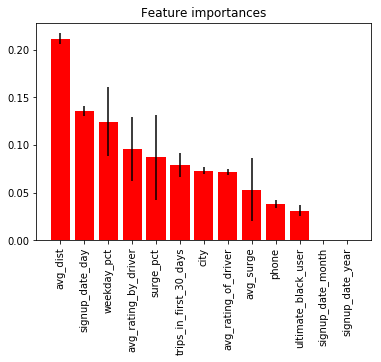

In [68]:
#back calculate which features have the highest predictive importance for retention
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices[f]], importances[indices[f]]))
    #print("%d. %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(X_train.columns.values, indices)
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

There are a number of possible actionable steps that result from this analysis. The android app could be improved since androids retention is lower. It is possiple that the pay day of the month could could affect retention, since the day of the month is one of the more important factors. The weekday percentage is higher for those retained, possibly since that means they have fit it into their regular weekday schedule. King's landing is a better location for the service, so the benefits of that location should be investigated.